In [1]:
import os
from pathlib import Path
import tqdm
try:
    os.chdir(os.path.join(os.getcwd(), '..')) # '.' if the path is to current folder
    print(os.getcwd())
except:
    pass

/Users/RAUL.ALARES/Documents/src/clothes-extractor


In [2]:
from src.dataset import ClothesDataLoader, ClothesDataset
import matplotlib.pyplot as plt
from src.config import Config
from skimage.io import imread, imshow
from skimage.color import rgb2hsv
import skimage as ski
from PIL import Image
import numpy as np


In [3]:
!pwd

/Users/RAUL.ALARES/Documents/src/clothes-extractor


In [4]:
cfg = Config()
cfg.dataset_dir = "./data/zalando-hd-resized"
cfg.dataset_mode = "test"
cfg.load_height = 1024
cfg.load_width = 768

In [5]:
filename = os.path.join(cfg.dataset_dir, cfg.dataset_mode, "image-parse-v3", '00057_00.png')

hair_color = (254,0,0)
t_shirt_color = (254,85,0)
neck_color = (85,51,0)
botton_color = (0,85,85)
face_color = (0,0,254)
black = (0,0,0)
white = (255, 255, 255)

img = Image.open(filename).convert('RGB')


data = np.array(img)
data[(data != black).any(axis = -1)] = black
reference = data.copy()
hide = data.copy()

data = np.array(img)
data[(data != hair_color).any(axis = -1)] = black
data[(data == hair_color).all(axis = -1)] = white
hide += data
hair = Image.fromarray(data[:,:,0], mode='L')

data = np.array(img)
data[(data != t_shirt_color).any(axis = -1)] = black
data[(data == t_shirt_color).all(axis = -1)] = white
#all += data
t_shirt = Image.fromarray(data[:,:,0], mode='L')

data = np.array(img)
data[(data != face_color).any(axis = -1)] = black
data[(data == face_color).all(axis = -1)] = white
reference += data
face = Image.fromarray(data[:,:,0], mode='L')

data = np.array(img)
data[(data != neck_color).any(axis = -1)] = black
data[(data == neck_color).all(axis = -1)] = white
reference += data
neck = Image.fromarray(data[:,:,0], mode='L')

data = np.array(img)
data[(data != botton_color).any(axis = -1)] = black
data[(data == botton_color).all(axis = -1)] = white
hide += data
bottom = Image.fromarray(data[:,:,0], mode='L')

hide = Image.fromarray(hide[:,:,0], mode='L')
reference = Image.fromarray(reference[:,:,0], mode='L')

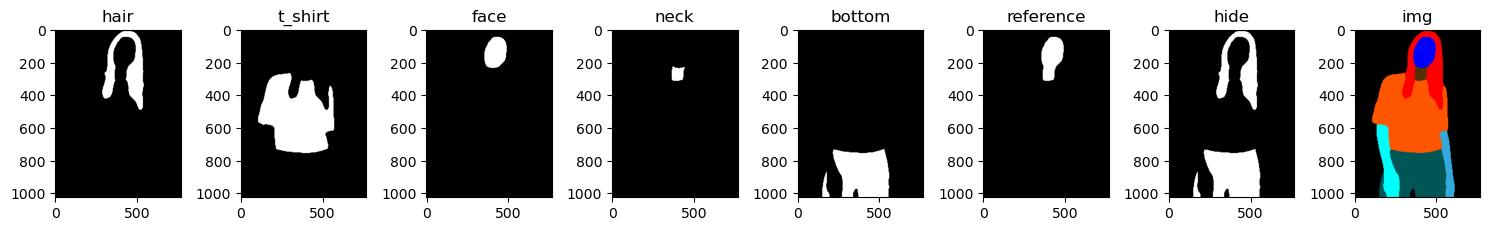

In [6]:
fig, ax = plt.subplots(1, 8, figsize=(15, 5))
ax[0].imshow(hair, cmap='gray')
ax[0].set_title('hair')
ax[1].imshow(t_shirt, cmap='gray')
ax[1].set_title('t_shirt')
ax[2].imshow(face, cmap='gray')
ax[2].set_title('face')
ax[3].imshow(neck, cmap='gray')
ax[3].set_title('neck')
ax[4].imshow(bottom, cmap='gray')
ax[4].set_title('bottom')
ax[5].imshow(reference, cmap='gray')
ax[5].set_title('reference')
ax[6].imshow(hide, cmap='gray')
ax[6].set_title('hide')
ax[7].imshow(img)
ax[7].set_title('img')
fig.tight_layout()

In [7]:
white = (1, 1, 1)

def get_images_without_orange(src_dir: str) -> None:
    p_src = Path(src_dir)
    count = 0
    files = sorted(p_src.glob('*'))
    print(len(files))
    for f in files:
        #filename = os.path.join(src_dir, f)
        count += 1
        if count >= 50000:
            break
        #read the source image
        image = Image.open(f)
        img = Image.open(f).convert('RGB')
        data = np.array(img)
        data[(data != t_shirt_color).any(axis = -1)] = black
        data[(data == t_shirt_color).all(axis = -1)] = white
        data = data[:,:,0]
        if np.sum(data) == 0:
            print(f'{f}')
        # fig, ax = plt.subplots(1, 2, figsize=(15, 5))
        # ax[0].imshow(Image.fromarray(data, mode='L'), cmap='gray')
        # ax[0].set_title('hair')
        # fig.tight_layout()
        del(image)
        #decrease resolution
    print(count)

#get_images_without_orange("./data/zalando-hd-resized/test/image-parse-v3")

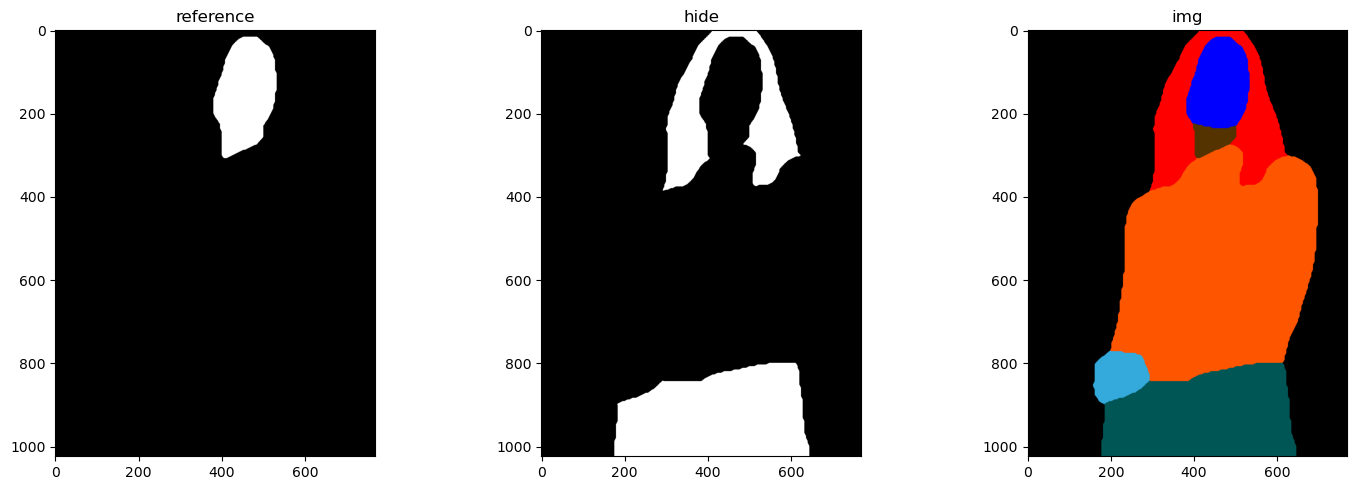

In [10]:
def get_mask_by_color(img_tensor, colors):
    black = (0,0,0)
    white = (255, 255, 255)        

    data = img_tensor.copy()
    data[(data != black).any(axis = -1)] = black
    result = data.copy()
    for color in colors:
        data = img_tensor.copy()
        data[(data != color).any(axis = -1)] = black
        data[(data == color).all(axis = -1)] = white
        result += data
    return result

filename = os.path.join(cfg.dataset_dir, cfg.dataset_mode, "image-parse-v3", '00064_00.png')

hair_color = (254,0,0)
t_shirt_color = (254,85,0)
neck_color = (85,51,0)
botton_color = (0,85,85)
face_color = (0,0,254)
black = (0,0,0)
white = (255, 255, 255)

img = Image.open(filename).convert('RGB')

reference = get_mask_by_color(np.array(img), [face_color, neck_color])
hide = get_mask_by_color(np.array(img), [hair_color, botton_color])

hide = Image.fromarray(hide[:,:,0], mode='L')
reference = Image.fromarray(reference[:,:,0], mode='L')

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(reference, cmap='gray')
ax[0].set_title('reference')
ax[1].imshow(hide, cmap='gray')
ax[1].set_title('hide')
ax[2].imshow(img)
ax[2].set_title('img')
fig.tight_layout()